<a href="https://colab.research.google.com/github/viktoruebelhart/analyzing-financial-fraud/blob/main/analyzing_financial_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project is dedicated to building a robust solution for detecting fraudulent activities. By developing and implementing advanced analytical techniques, the project aims to identify suspicious patterns and irregularities that may indicate fraudulent behavior. The ultimate goal is to create a reliable system that can flag potentially fraudulent transactions or activities, enhancing security and supporting proactive measures against fraud.

Key stages of the process include:

*  Conducting exploratory data analysis
*  Analyzing correlations
*  Engineering features
*  Building and training models
*  Assessing model performance

dataset:
https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view?usp=sharing

# Importing the dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray

from datetime import datetime as dt
from datetime import timedelta as td

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Feature importance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Alura/fraud_detection_dataset.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- step - indicates the total time passed in hours from the start of the simulation, ranging between 1 and 744 (representing a 30-day period).

- type - specifies the type of transaction, such as deposit, withdrawal, debit, payment, or transfer.

- amount - reflects the total value involved in the transaction.

- nameOrig - identifies the customer who initiated the transaction.

- oldbalanceOrg - shows the account balance of the initiating party before the transaction occurred.

- newbalanceOrig - shows the updated balance of the origin account after the transaction.

- nameDest - refers to the intended recipient or target of the transaction.

- oldbalanceDest - captures the balance of the recipient's account prior to the transaction.

- newbalanceDest - displays the balance of the destination account after the transaction.

- isFraud - indicates if the transaction is classified as fraudulent. In this scenario, fraud is assumed to occur when a user’s account is accessed and drained through transfers, followed by a withdrawal from the destination account.

- isFlaggedFraud - marked by the bank as potential fraud if the transaction attempts to transfer an amount exceeding 200,000.

##Exploratory Data Analysis (EDA)


##check the information in our dataset and analyze classification and fulfillment

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


There isn't any null value in the dataset

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
percentage_frau = df['isFraud'].value_counts(normalize=True) * 100
percentage_frau

,proportion
isFraud,
0,99.870918
1,0.129082


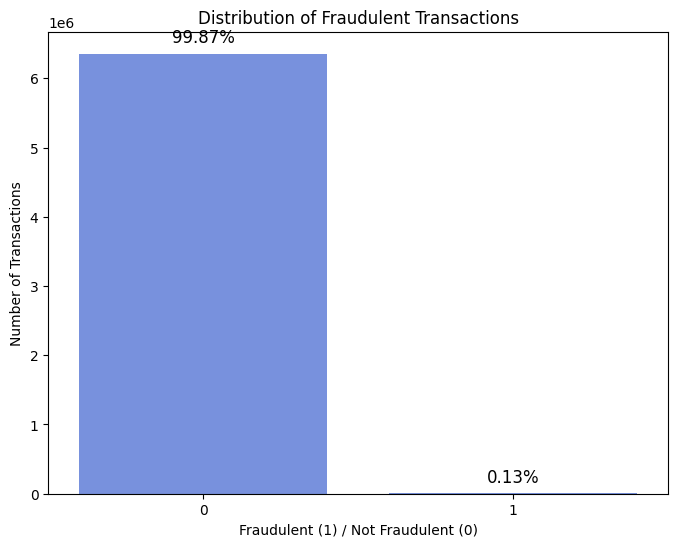

In [10]:
# Calculate the percentage of fraudulent transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(8, 6))
sns.set_palette("coolwarm")
ax = sns.countplot(x='isFraud', data=df)

# Customize title and axis labels
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Number of Transactions')

# Add percentage labels to the bars
for p, percentage in zip(ax.patches, fraud_percentage):
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=12,
                color='black')

plt.show()

Based on the analysis, the percentage of fraudulent transactions (isFraud) is very low, with only 0.13% of transactions marked as fraud, while 99.87% are non-fraudulent. This highly imbalanced distribution suggests a significant class imbalance, which can impact the performance of any predictive models trained on this data.

Let's begin by evaluating the effectiveness of the bank's fraud detection engine.
We started by examining the total fraud referrals that were conducted.

In [11]:
# Analyze the effectiveness of the bank's fraud detection system.
# Calculate how many fraudulent transactions were correctly identified by the bank.

true_positives = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)])
false_negatives = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)])
total_fraudulent = len(df[df['isFraud'] == 1])

bank_accuracy = (true_positives / total_fraudulent) * 100

print(f"Number of True Positives: {true_positives}")
print(f"Number of False Negatives: {false_negatives}")
print(f"Total Fraudulent Transactions: {total_fraudulent}")
print(f"Bank Accuracy in identifying fraud: {bank_accuracy:.2f}%")

Number of True Positives: 16
Number of False Negatives: 8197
Total Fraudulent Transactions: 8213
Bank Accuracy in identifying fraud: 0.19%


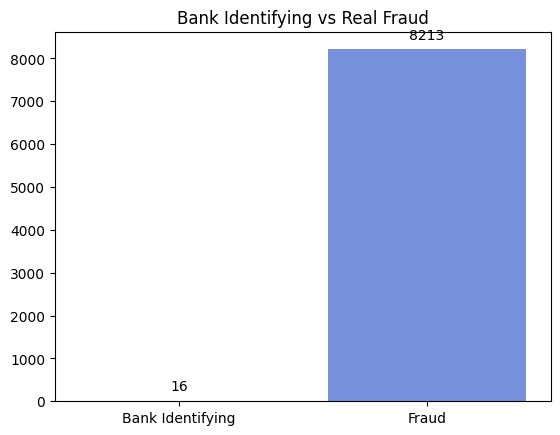

In [12]:
ax = sns.barplot(x=['Bank Identifying', 'Fraud'],
                 y=[df.isFlaggedFraud.sum(), df.isFraud.sum()])
plt.title('Bank Identifying vs Real Fraud')

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.show()

The bank's fraud detection engine shows a low accuracy in identifying fraudulent transactions, with only 16 true positives out of 8,213 total fraudulent transactions. This results in a significant number of false negatives (8,197), where fraud went undetected. Consequently, the bank's accuracy in detecting fraud is just 0.19%, indicating that the current detection system may require substantial improvements to effectively identify and mitigate fraudulent activity.

##Fraud analysis over time

In [13]:
#Fraud over Step time
fraud_counts = df[df['isFraud'] == 1].groupby('step').size()
fraud_counts

,0
step,
1,16
2,8
3,4
4,10
5,6
...,...
739,10
740,6
741,22


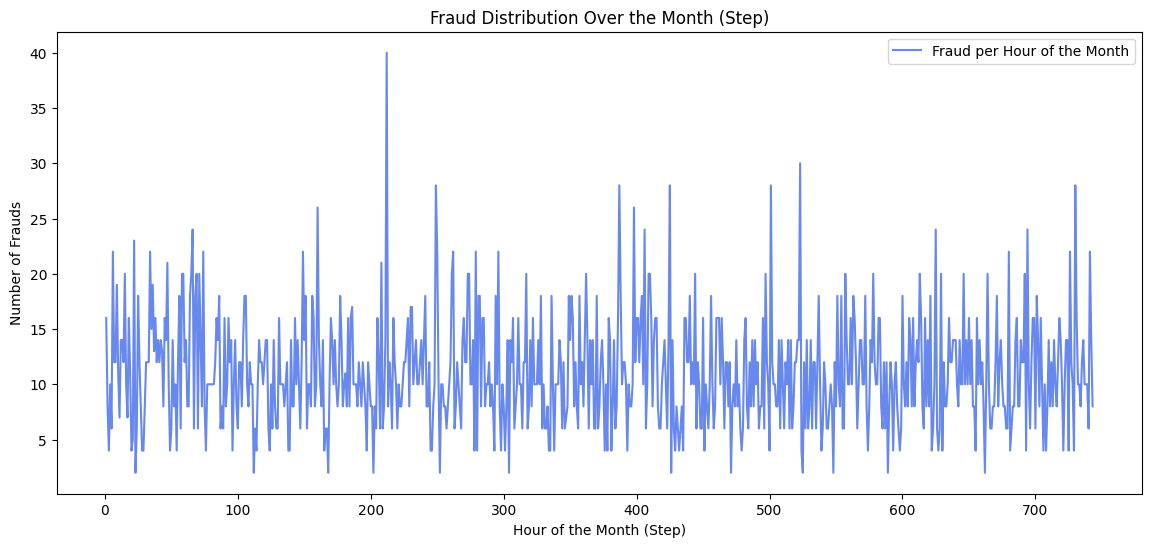

In [14]:
# Plot fraud_counts (fraud per each hour of the month)
plt.figure(figsize=(14, 6))
plt.plot(fraud_counts.index, fraud_counts.values, label="Fraud per Hour of the Month")
plt.xlabel('Hour of the Month (Step)')
plt.ylabel('Number of Frauds')
plt.title('Fraud Distribution Over the Month (Step)')
plt.legend()
plt.show()

In [15]:
# Get the top 5 hours with the highest fraud counts
top_5_fraud_counts = fraud_counts.nlargest(5)

# Display the top 5 hours
print("Top 5 Hours with Highest Fraud Counts:")
print(top_5_fraud_counts)

Top 5 Hours with Highest Fraud Counts:
step
212    40
523    30
249    28
387    28
425    28
dtype: int64


This consistent pattern indicates that fraud attempts may be occurring throughout the day rather than being concentrated in specific high-risk periods.

## Distribution of the number of operations

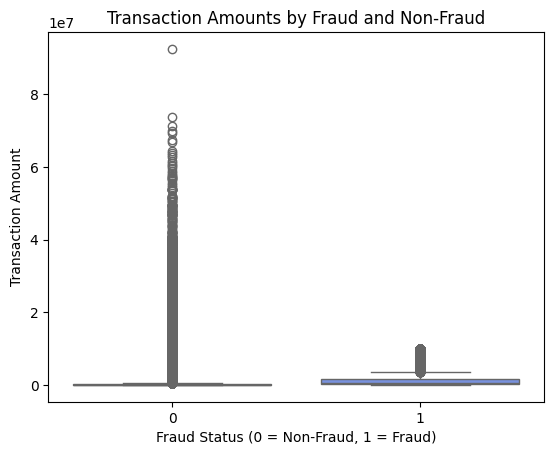

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the transaction amount divided by fraud/non-fraud
sns.boxplot(data=df, x='isFraud', y='amount')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts by Fraud and Non-Fraud')
plt.show()

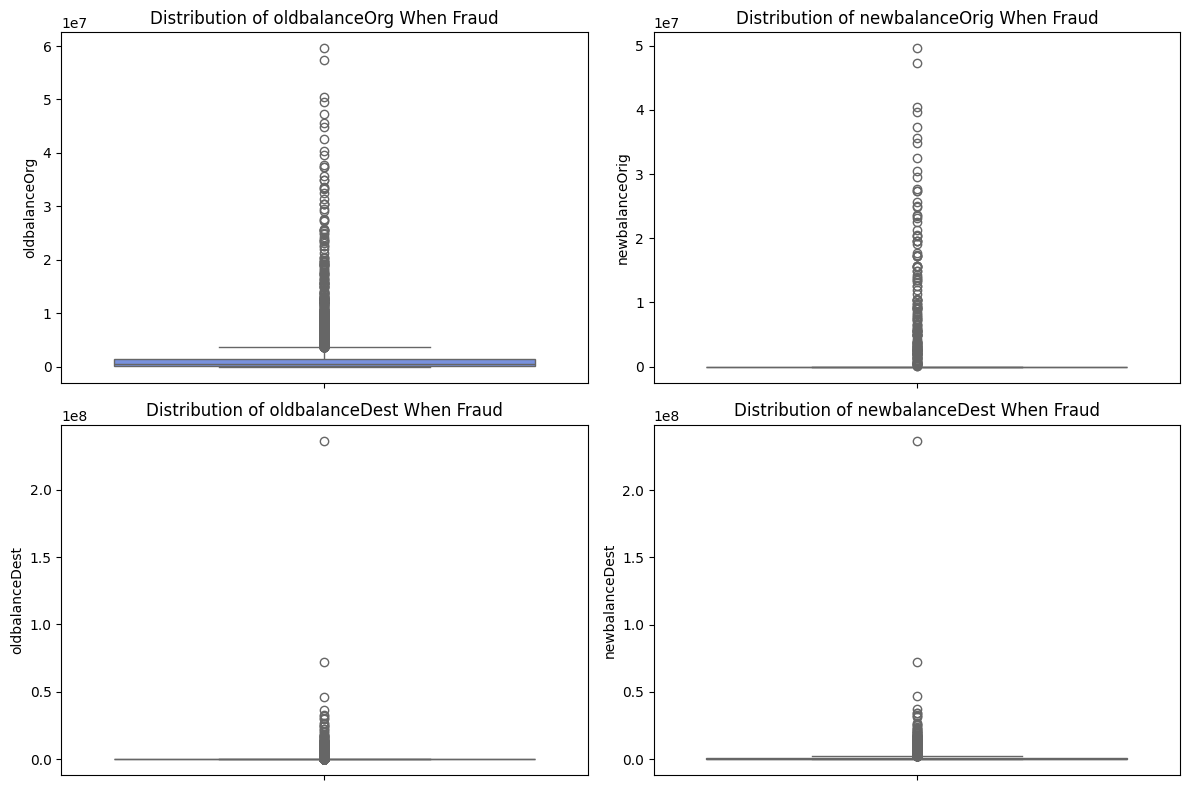

In [17]:
# Checking distribution of source and destination accounts when FRAUD
features_counts = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig = plt.figure(figsize=(12, 8))

for i, column in enumerate(features_counts):
    ax = fig.add_subplot(2, 2, i + 1)  # Use enumerate to get the index
    sns.boxplot(data=df[df.isFraud == 1], y=column, )  # Use y=column to set the y-axis
    ax.set_title(f'Distribution of {column} When Fraud')  # Add title for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [18]:
# Filter only fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

In [19]:
# Descriptive statistics for amount
amount_stats_amount = fraudulent_transactions['amount'].describe()
print("Descriptive Statistics for Amount in Fraudulent Transactions:")
print(amount_stats_amount)

Descriptive Statistics for Amount in Fraudulent Transactions:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


In [20]:
# Descriptive statistics for balances
balance_stats = fraudulent_transactions[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

print("\nDescriptive Statistics for Balances in Fraudulent Transactions:")
print(balance_stats)


Descriptive Statistics for Balances in Fraudulent Transactions:
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count   8.213000e+03    8.213000e+03    8.213000e+03    8.213000e+03
mean    1.649668e+06    1.923926e+05    5.442496e+05    1.279708e+06
std     3.547719e+06    1.965666e+06    3.336421e+06    3.908817e+06
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00
25%     1.258224e+05    0.000000e+00    0.000000e+00    0.000000e+00
50%     4.389835e+05    0.000000e+00    0.000000e+00    4.676420e+03
75%     1.517771e+06    0.000000e+00    1.478287e+05    1.058725e+06
max     5.958504e+07    4.958504e+07    2.362305e+08    2.367265e+08


Overall Conclusions

High-value Transactions: The data indicates that fraudulent transactions often involve high amounts of money, suggesting that fraudsters are targeting substantial sums.

Variability: The high standard deviations across amounts and balances indicate a diverse range of behaviors and strategies in fraudulent transactions.

Impact on Origin Accounts: The analysis suggests that the balances in origin accounts are significantly impacted post-transaction, with funds being drained as part of the fraudulent activities.

Targeting of Accounts: The data indicates that accounts with high balances are frequently targeted, both for withdrawals and transfers.

Potential for Multiple Transactions: The wide range of transaction amounts and balances implies that fraudsters may employ various tactics, possibly conducting multiple smaller transactions alongside larger ones to evade detection.

##Analyze transaction types

In [21]:
#counts the type of trasaction
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [22]:
# Calculate the percentage of each transaction type
type_percentage = df['type'].value_counts(normalize=True) * 100

# Display the result
print('The percentage of each transaction \n', type_percentage)

The percentage of each transaction 
 type
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: proportion, dtype: float64


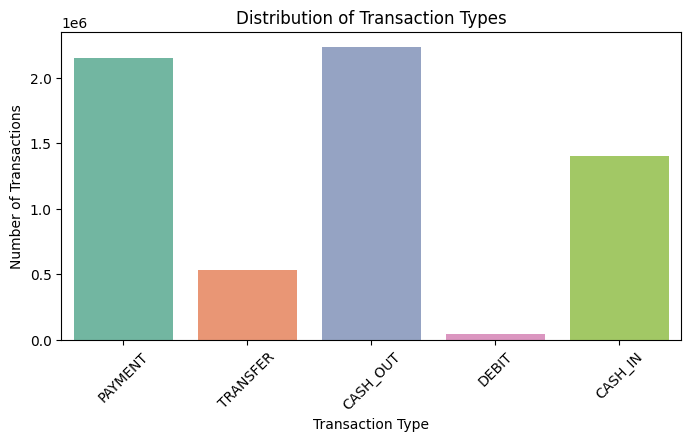

In [23]:
# Plotting the distribution of transaction types with distinct colors for each type
plt.figure(figsize=(8, 4))

# Countplot with a custom palette to apply different colors to each transaction type
sns.countplot(x='type', data=df, palette='Set2')

# Setting the title and axis labels
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [24]:
#counts the type of trasaction when is Fraud
type_fraud = df[df['isFraud'] == 1]['type'].value_counts()
type_fraud

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [25]:
# Calculate the percentage of each fraud transaction type
type_fraud_percentage = df[df['isFraud'] == 1]['type'].value_counts(normalize=True) * 100

# Display the result
print('The percentage of each fraud transaction type \n', type_fraud_percentage)

The percentage of each fraud transaction type 
 type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: proportion, dtype: float64


([0, 1], [Text(0, 0, 'TRANSFER'), Text(1, 0, 'CASH_OUT')])

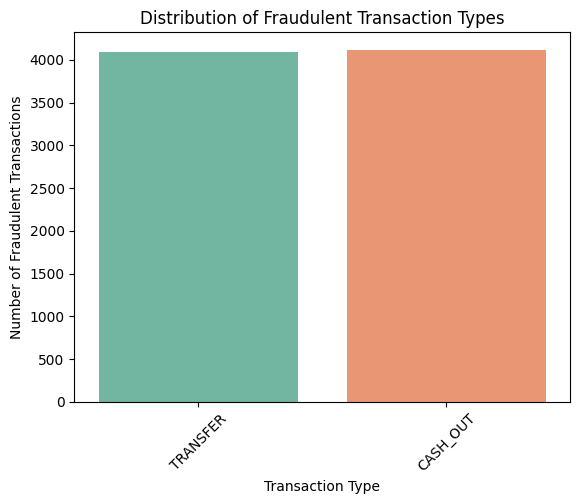

In [26]:
sns.countplot(x='type', data=df[df['isFraud'] == 1], palette='Set2')
plt.title('Distribution of Fraudulent Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)

##Evaluating account names

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [28]:
# quantity of each name in the origin list
df.nameOrig.value_counts()

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
...,...
C98968405,1
C720209255,1
C1567523029,1


In [29]:
# quantity of each destiny list name
df['nameDest'].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1


The amounts associated with the same target name are significantly higher than those for the source.

It would be useful to conduct a deeper analysis of the destine names.

In [30]:
# Analyze 'nameDest' for fraudulent transactions

# Group fraudulent transactions by 'nameDest' and count occurrences
fraudulent_nameDest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()

# Display the top N most frequent 'nameDest' in fraudulent transactions
N = 10  # Change N to see a different number of top names
print(f"Top {N} 'nameDest' involved in fraudulent transactions:")
print(fraudulent_nameDest_counts.head(N))

# Analyze the distribution of transaction amounts for these top 'nameDest'
for name in fraudulent_nameDest_counts.head(N).index:
    amounts = df[(df['isFraud'] == 1) & (df['nameDest'] == name)]['amount']
    print(f"\nTransaction amounts for 'nameDest' = {name}:")
    print(amounts.describe())


Top 10 'nameDest' involved in fraudulent transactions:
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64

Transaction amounts for 'nameDest' = C1193568854:
count         2.0000
mean     198743.0050
std       36525.5230
min      172915.5600
25%      185829.2825
50%      198743.0050
75%      211656.7275
max      224570.4500
Name: amount, dtype: float64

Transaction amounts for 'nameDest' = C104038589:
count    2.000000e+00
mean     1.101385e+06
std      1.342573e+06
min      1.520422e+05
25%      6.267136e+05
50%      1.101385e+06
75%      1.576056e+06
max      2.050728e+06
Name: amount, dtype: float64

Transaction amounts for 'nameDest' = C200064275:
count       2.000000
mean     4423.500000
std      6015.357388
min       170.000000
25%      2296.750000
50%      4423.500000
75%      6550.250000
max      8677.000000
Name: amount, dtype

In [31]:
# Group by 'nameDest' and 'isFraud' and count transactions.
transaction_counts = df.groupby(['nameDest', 'isFraud']).size().unstack(fill_value=0)

# Get the 'nameDest' from fraudulent_nameDest_counts
names = fraudulent_nameDest_counts.index

# Filter transaction counts for the names
transaction_counts = transaction_counts.loc[names]

# Display the results
transaction_counts

isFraud,0,1
nameDest,,
C1193568854,35,2
C104038589,21,2
C200064275,31,2
C1497532505,10,2
C1601170327,14,2
...,...,...
C317811789,2,1
C24324787,7,1
C1053414206,11,1


Several recipients involved in fraudulent transactions conducted numerous transactions over the period, with only one or two being flagged as fraudulent.

Let's examine the distribution of transaction counts for recipients who experienced at least one fraudulent transaction.

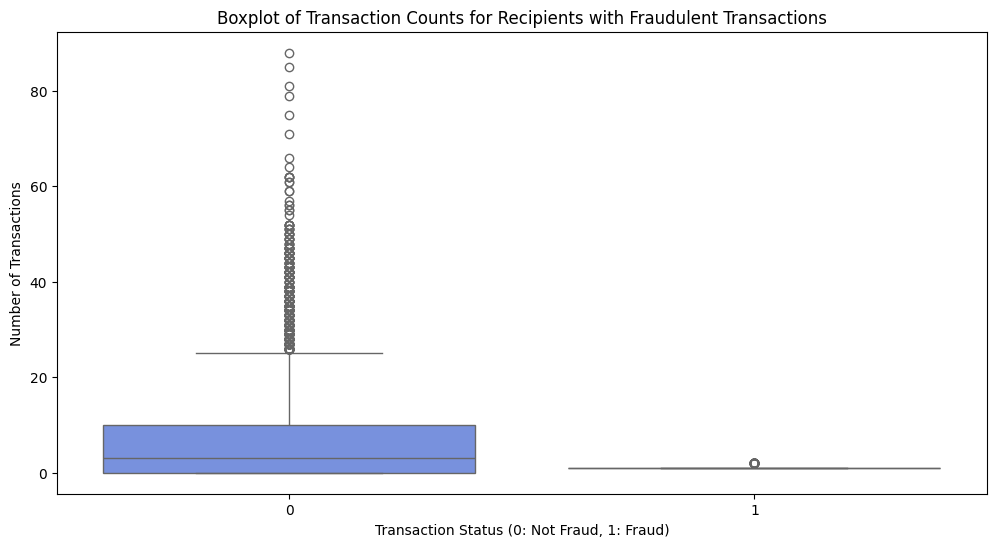

In [32]:
#boxplot do transaction_counts

plt.figure(figsize=(12, 6))
sns.boxplot(data=transaction_counts)
plt.title('Boxplot of Transaction Counts for Recipients with Fraudulent Transactions')
plt.xlabel('Transaction Status (0: Not Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [33]:
# (IQR) do transaction_counts

# Calculate the first quartile (Q1)
Q1 = transaction_counts.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = transaction_counts.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print("IQR of transaction_counts:")
IQR

IQR of transaction_counts:


,0
isFraud,
0,10.0
1,0.0


#Does this distribution differ from that of other recipients (those with no involvement in fraudulent transactions)?

In [34]:
# Analyze transactions for nameDest where isFraud is 0
non_fraudulent_transactions = df[df['isFraud'] == 0]

# Group by 'nameDest' and count transactions
non_fraudulent_nameDest_counts = non_fraudulent_transactions['nameDest'].value_counts()

# Display the top N most frequent 'nameDest' in non-fraudulent transactions
N = 10  # Change N to see a different number of top names
print(f"Top {N} 'nameDest' involved in non-fraudulent transactions:")
print(non_fraudulent_nameDest_counts.head(N))

# Analyze the distribution of transaction amounts for these top 'nameDest'
for name in non_fraudulent_nameDest_counts.head(N).index:
    amounts = non_fraudulent_transactions[(non_fraudulent_transactions['nameDest'] == name)]['amount']
    print(f"\nTransaction amounts for 'nameDest' = {name}:")
    print(amounts.describe())

#Further analysis, you could compare these results with the fraudulent transactions
# to look for patterns or differences.  For example, you could compute the average
# transaction amount for each nameDest in both fraudulent and non-fraudulent
# transactions, and compare them using a box plot.

Top 10 'nameDest' involved in non-fraudulent transactions:
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

Transaction amounts for 'nameDest' = C1286084959:
count    1.130000e+02
mean     6.852119e+05
std      2.616135e+06
min      2.373110e+03
25%      1.196750e+05
50%      2.467958e+05
75%      4.250524e+05
max      2.130032e+07
Name: amount, dtype: float64

Transaction amounts for 'nameDest' = C985934102:
count    1.090000e+02
mean     3.892008e+05
std      5.533752e+05
min      1.162190e+03
25%      1.337858e+05
50%      2.053688e+05
75%      3.850772e+05
max      2.975990e+06
Name: amount, dtype: float64

Transaction amounts for 'nameDest' = C665576141:
count    1.050000e+02
mean     8.452322e+05
std      2.975835e+06
min      3.428950e+03
25%      1.365643e+05
50%      2.788095e+05
75%      5.653499e+05
m

In [35]:
non_fraudulent_nameDest_counts

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M435905844,1
M534128698,1
M2140757139,1


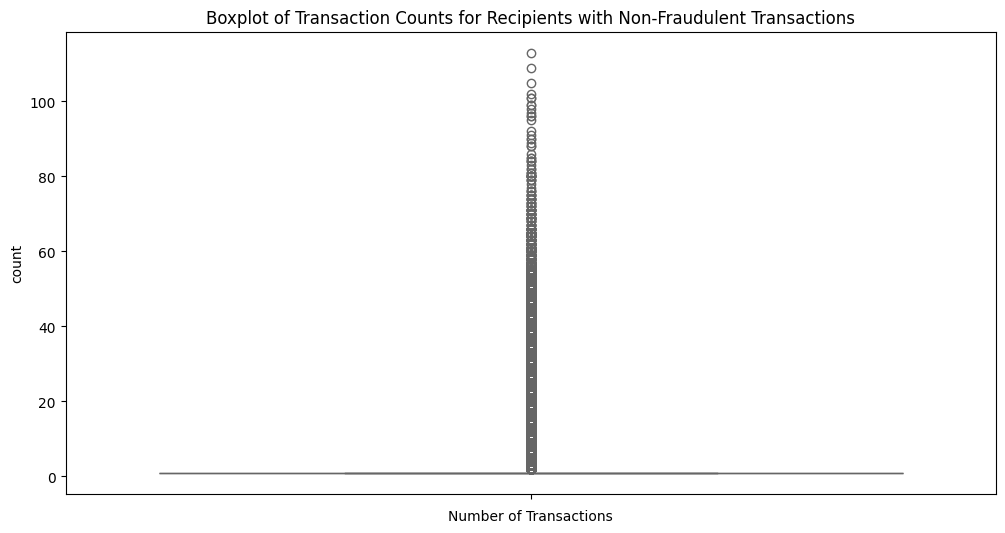

In [36]:
#boxplot do non_fraudulent_nameDest_counts

plt.figure(figsize=(12, 6))
sns.boxplot(data=non_fraudulent_nameDest_counts)
plt.title('Boxplot of Transaction Counts for Recipients with Non-Fraudulent Transactions')
plt.xlabel('Number of Transactions')
plt.show()

In [37]:
#(IQR) do non_fraudulent_nameDest_counts

# Calculate the first quartile (Q1)
Q1 = non_fraudulent_nameDest_counts.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = non_fraudulent_nameDest_counts.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) of non_fraudulent_nameDest_counts is: {IQR}")

The Interquartile Range (IQR) of non_fraudulent_nameDest_counts is: 0.0


There was a difference in the distribution of transaction counts between recipients involved in fraudulent transactions and those who were not.

<Axes: >

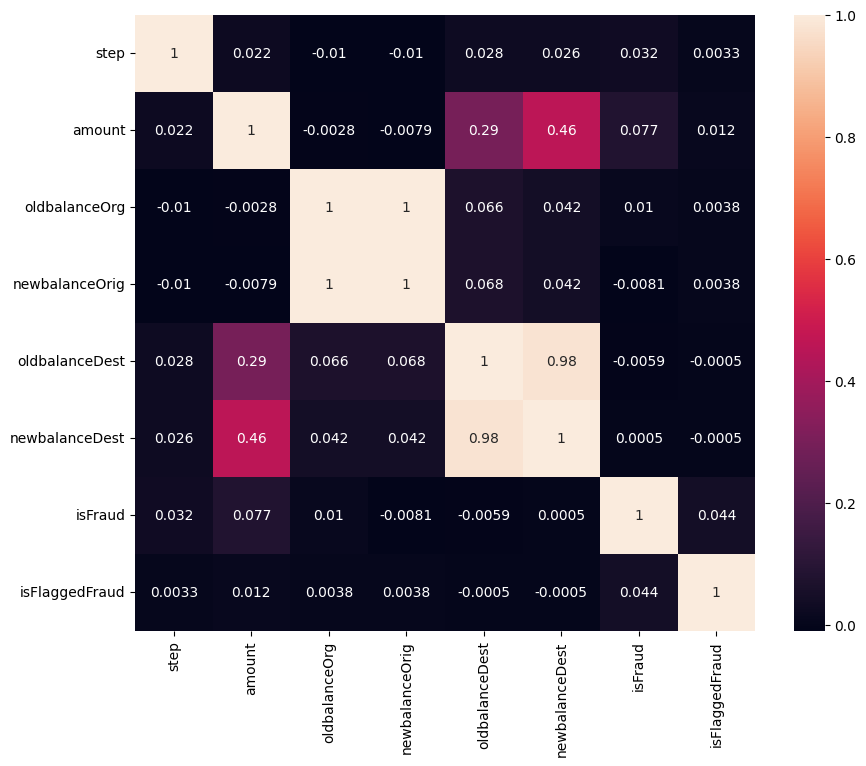

In [38]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# plotting the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(round(numerical_df.corr(),4),
            annot=True)

In [39]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [40]:
#transform colum 'type' string in int

# Create a mapping for transaction types to numerical values
type_mapping = {
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'CASH_IN': 4
}

# Apply the mapping to the 'type' column
df['type_int'] = df['type'].map(type_mapping)

# Now 'type_int' contains the corresponding numerical values
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_int
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


<Axes: >

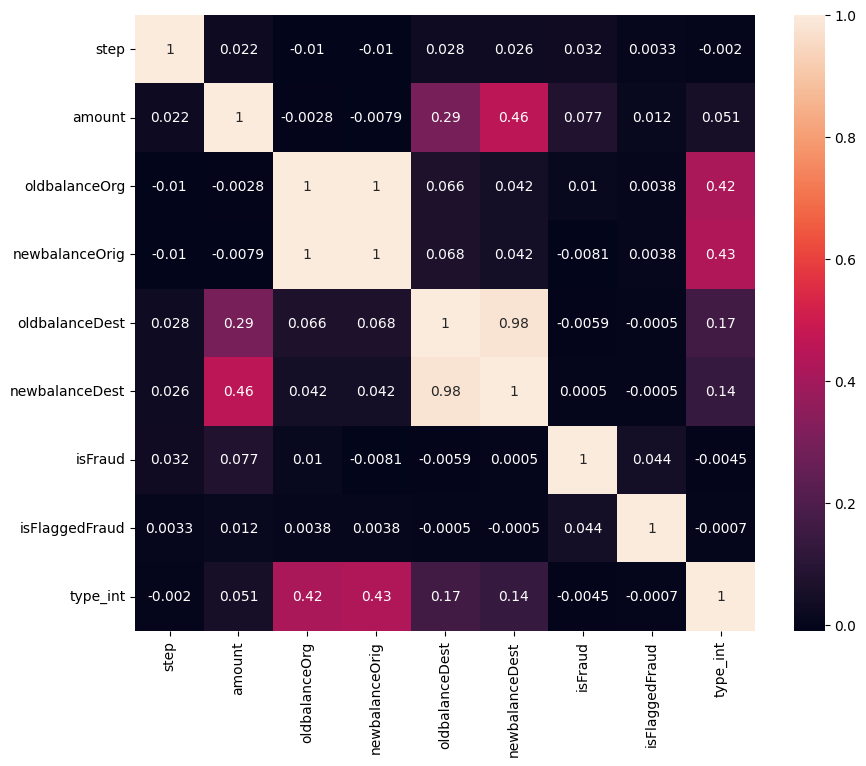

In [41]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# plotting the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(round(numerical_df.corr(),4),
            annot=True)

In [42]:
#correlation
correlation_matrix = numerical_df.corr()

# Exibe a matriz de correlação
print(correlation_matrix)


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   
type_int       -0.001992  0.050693       0.415700        0.431006   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  \
step                  0.027665        0.025888  0.031578        0.003277   
amount                0.294137        0.459304  0.076688        0.012295   
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835   
newba

In [43]:
#Selecting the highest correlations
correlation_matrix = numerical_df.corr()

# Transforms the correlation matrix into a DataFrame and resets the index
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Removes the correlations of a variable with itself
correlation_pairs = correlation_pairs[correlation_pairs['Variable1'] != correlation_pairs['Variable2']]

# Sorts by the absolute value of the correlation, in descending order
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
sorted_correlation_pairs = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Displays the pairs with the strongest correlations (e.g., above 0.4)
strong_correlations = sorted_correlation_pairs[sorted_correlation_pairs['AbsCorrelation'] > 0.4]
print(strong_correlations)


         Variable1       Variable2  Correlation  AbsCorrelation
21   oldbalanceOrg  newbalanceOrig     0.998803        0.998803
29  newbalanceOrig   oldbalanceOrg     0.998803        0.998803
49  newbalanceDest  oldbalanceDest     0.976569        0.976569
41  oldbalanceDest  newbalanceDest     0.976569        0.976569
46  newbalanceDest          amount     0.459304        0.459304
14          amount  newbalanceDest     0.459304        0.459304
75        type_int  newbalanceOrig     0.431006        0.431006
35  newbalanceOrig        type_int     0.431006        0.431006
74        type_int   oldbalanceOrg     0.415700        0.415700
26   oldbalanceOrg        type_int     0.415700        0.415700


Strong Positive Correlations:

oldbalanceOrg and newbalanceOrig have an extremely high correlation (0.9988), suggesting these variables are almost identical in value. This could indicate that, in many cases, the new balance of the origin account (newbalanceOrig) is directly tied to its old balance (oldbalanceOrg).
newbalanceDest and oldbalanceDest also have a very high correlation (0.9766), implying a similar close relationship between these two variables.

Conclusion: These high correlations might mean that these pairs are redundant in predictive modeling. We could consider dropping one variable in each pair to avoid multicollinearity if using models that assume independence among predictors, such as linear regression.

In [44]:
#show the correlation all features with isFraud

# Calculate the correlation between all features and 'isFraud'
correlation_with_fraud = numerical_df.corr()['isFraud'].sort_values(ascending=False)

# Print the correlations
correlation_with_fraud

,isFraud
isFraud,1.000000
amount,0.076688
isFlaggedFraud,0.044109
step,0.031578
oldbalanceOrg,0.010154
newbalanceDest,0.000535
type_int,-0.004463
oldbalanceDest,-0.005885
newbalanceOrig,-0.008148


Weak Correlation with All Variables:

The highest correlation with isFraud is with amount (0.0767), which is still quite low. None of the variables have a strong or even moderate correlation with isFraud.
Other variables like isFlaggedFraud (0.0441) and step (0.0316) show even weaker positive correlations, while some features like type_int, oldbalanceDest, and newbalanceOrig have very slight negative correlations.

Implications:

These weak correlations suggest that none of these individual variables alone have a strong linear relationship with isFraud. This could imply that identifying fraud might require more complex interactions between features rather than relying on single-variable thresholds.
It also suggests that linear models may struggle to accurately predict fraud based solely on these features. Non-linear models or models that capture interactions between multiple variables (like decision trees, random forests, or neural networks) might perform better in detecting fraud.

#let's check fraud percentage according to transactions per hour

In [45]:
# Create a new column 'hour_of_day' representing the hour of the day (0-23)
df['hour_of_day'] = (df['step'] - 1) % 24


In [46]:
# Calculate the total number of transactions per hour
transactions_per_hour = df.groupby('hour_of_day').size()

print(transactions_per_hour)

hour_of_day
0      27111
1       9018
2       2007
3       1241
4       1641
5       3420
6       8988
7      26915
8     283518
9     425729
10    445992
11    483418
12    468474
13    439653
14    416686
15    441612
16    439941
17    580509
18    647814
19    553728
20    247806
21    194555
22    141257
23     71587
dtype: int64


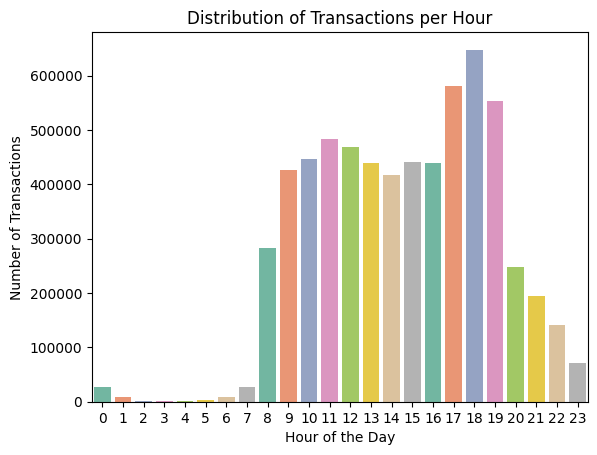

In [47]:
sns.countplot(x='hour_of_day', data=df, palette='Set2')
plt.title('Distribution of Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

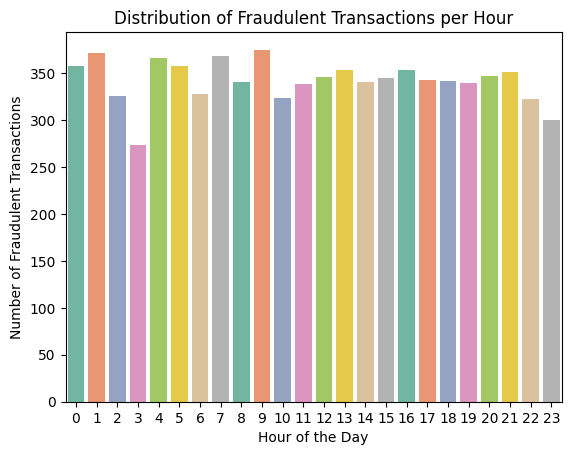

In [48]:
# Filter transactions where isFraud is 1
fraudulent_transactions = df[df['isFraud'] == 1]

# Create a countplot of transactions per hour for fraudulent transactions
sns.countplot(x='hour_of_day', data=fraudulent_transactions, palette='Set2')
plt.title('Distribution of Fraudulent Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [49]:
# Calculate the percentage of fraudulent transactions per hour of the day
fraud_percentage_per_hour = df.groupby('hour_of_day')['isFraud'].mean() * 100

# Print the result
print(fraud_percentage_per_hour)

hour_of_day
0      1.320497
1      4.125083
2     16.243149
3     22.078969
4     22.303473
5     10.467836
6      3.649310
7      1.367267
8      0.120275
9      0.088084
10     0.072647
11     0.070126
12     0.073857
13     0.080291
14     0.081836
15     0.078123
16     0.080238
17     0.059086
18     0.052793
19     0.061402
20     0.140029
21     0.180412
22     0.228661
23     0.419071
Name: isFraud, dtype: float64


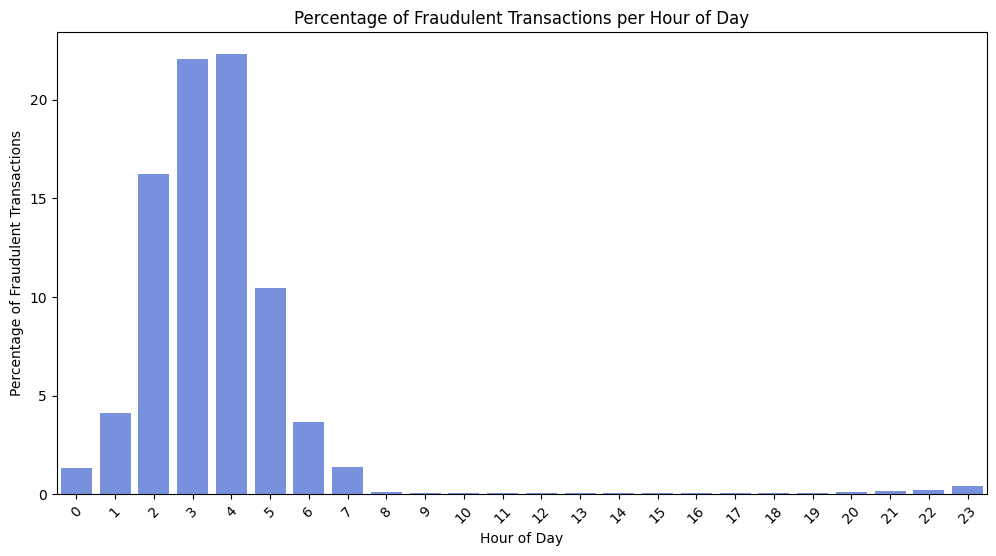

In [50]:
# Create a bar plot to visualize the fraud percentage per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_percentage_per_hour.index, y=fraud_percentage_per_hour.values)
plt.title('Percentage of Fraudulent Transactions per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

The first 8 hours are more likely to have frauds.

In [51]:
# Add the fraud percentage per hour as a new column to the DataFrame
df['fraud_percentage_per_hour'] = df['hour_of_day'].map(fraud_percentage_per_hour)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_int,hour_of_day,fraud_percentage_per_hour
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1.320497
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1.320497
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1.320497
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2,0,1.320497
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1.320497


In [52]:
#Create a new column with the quantity os transaction per nameDest

df['transaction_count_per_nameDest'] = df.groupby('nameDest')['nameOrig'].transform('count')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_int,hour_of_day,fraud_percentage_per_hour,transaction_count_per_nameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1.320497,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1.320497,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1.320497,44
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2,0,1.320497,41
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1.320497,1


#Clear and rename columns

In [53]:
df = df.drop(['step', 'type', 'nameOrig', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'hour_of_day'],axis=1)

In [54]:
print(df.columns)

Index(['amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_int', 'fraud_percentage_per_hour',
       'transaction_count_per_nameDest'],
      dtype='object')


In [55]:
#Rename columns
df = df.rename(columns={'fraud_percentage_per_hour': '%_Fraud_hour',
                        'transaction_count_per_nameDest': 'Quant_transc',
                        'type_int': 'type_transc'})

In [56]:
df

,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud,type_transc,%_Fraud_hour,Quant_transc
0,9839.64,170136.00,0.00,0,0,0,1.320497,1
1,1864.28,21249.00,0.00,0,0,0,1.320497,1
2,181.00,181.00,0.00,1,0,1,1.320497,44
3,181.00,181.00,0.00,1,0,2,1.320497,41
4,11668.14,41554.00,0.00,0,0,0,1.320497,1
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,339682.13,1,0,2,0.228661,2
6362616,6311409.28,6311409.28,0.00,1,0,1,0.228661,1
6362617,6311409.28,6311409.28,6379898.11,1,0,2,0.228661,3
6362618,850002.52,850002.52,0.00,1,0,1,0.228661,1


## Preprocessing

# Dividing into training, testing and validation

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import tensorflow as tf

In [70]:
# Train-Test-Validation Split Function
def train_test_validation_split(X, y):
    X = X.copy()

    # Step 1: Split into train and test+validation
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30, random_state=42)

    # Step 2: Split test+validation into test and validation
    X_test, X_valid, y_test, y_valid = train_test_split(X_test_val, y_test_val, test_size=0.50, random_state=42)

    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [71]:
X = df.drop(['isFraud'], axis=1)
y = df.isFraud

X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_validation_split(X=X, y=y)

In [72]:
print('X train:',X_train.shape)
print('y train:',y_train.shape)
print('X validation:',X_valid.shape)
print('y validation:',y_valid.shape)
print('X test:',X_test.shape)
print('y test:',y_test.shape)

X train: (4453834, 7)
y train: (4453834,)
X validation: (954393, 7)
y validation: (954393,)
X test: (954393, 7)
y test: (954393,)


In [76]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4453834 entries, 2408104 to 1692743
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amount          4453834 non-null  float64
 1   oldbalanceOrg   4453834 non-null  float64
 2   newbalanceDest  4453834 non-null  float64
 3   isFlaggedFraud  4453834 non-null  int64  
 4   type_transc     4453834 non-null  int64  
 5   %_Fraud_hour    4453834 non-null  float64
 6   Quant_transc    4453834 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 271.8 MB
